# Data

In [ ]:
#Official tutorial source: https://www.tensorflow.org/tutorials/images/cnn
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Creating train, validation and test split
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
print('TRAIN', train_images.shape)
print('TEST', test_images.shape)

TRAIN (50000, 32, 32, 3)
TEST (10000, 32, 32, 3)


[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


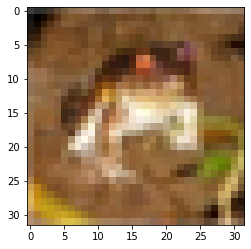

In [ ]:
#Showing first training image and its label
#Images are already resized (32x32) and normalized (between 0 and 1)
plt.imshow(train_images[0])
first_image_label = train_labels[0][0]
print(train_images[0])
print('label', first_image_label)

In [ ]:
#source https://www.cs.toronto.edu/~kriz/cifar.html
label_dict = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

print(first_image_label, '=',  label_dict[first_image_label])

6 = frog


# Model

In [ ]:
#Defining neural network model
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax')) 

Source https://www.researchgate.net/figure/An-example-of-CNN-architecture_fig1_320748406
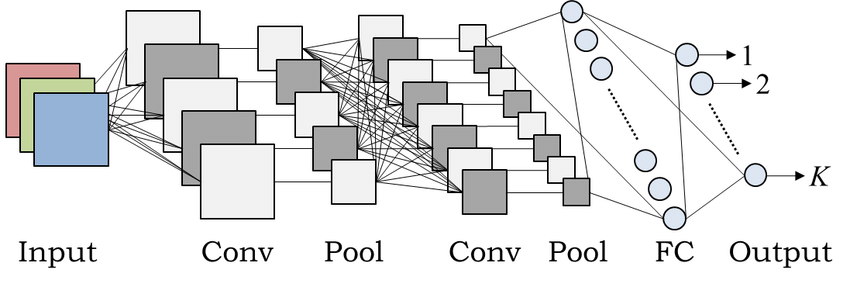

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 last_conv_layer (Conv2D)    (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

# Training

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 20s 8ms/step - loss: 1.4863 - accuracy: 0.4546
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0891 - accuracy: 0.6158
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9311 - accuracy: 0.6743
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8300 - accuracy: 0.7119
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7553 - accuracy: 0.7354
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6917 - accuracy: 0.7570
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6354 - accuracy: 0.7781
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5875 - accuracy: 0.7926
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5401 - accuracy: 0.8092
Epoch 10/10
1563/1563 [==============================] - 12s 7ms/step - l

# Evaluation

In [ ]:
_, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
_, train_acc = model.evaluate(train_images,  train_labels, verbose=0)

print('ACCURACIES (after the model is finished training)')
print('TRAIN', train_acc)
print('TEST', test_acc)

ACCURACIES (after the model is finished training)
TRAIN 0.8677200078964233
TEST 0.7164000272750854
